<a href="https://colab.research.google.com/github/anushkaagarwall/Python_Projects/blob/main/IML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#find-s
import pandas as pd
df=pd.read_csv('/content/Book1.csv')
print(df.head())
h=['x','x','x','x','x','x']
data=df.iloc[:,1:]

for i in range(len(df)):
  if (df['enjoysport'][i])=='yes':
    for j in range(len(h)):
      if h[j]=='x' or h[j]==data.iloc[i,j]:
        h[j]=data.iloc[i,j]
      elif h[j]!=data.iloc[i,j]:
        h[j]='?'
    print(h)

     sky    at       h       w water forecast enjoysport
0  sunny  warm  normal  strong  warm     same        yes
1  sunny  warm    high  strong  warm     same        yes
2  rainy  cold    high  strong  cold   change         no
3  sunny  warm    high  strong  warm   change        yes
['warm', 'normal', 'strong', 'warm', 'same', 'yes']
['warm', '?', 'strong', 'warm', 'same', 'yes']
['warm', '?', 'strong', 'warm', '?', 'yes']


In [ ]:
#candidate elimination
import pandas as pd

df1 = pd.read_csv('/content/book1 (1).csv', skiprows=1, header=None)
df1.columns = df1.iloc[0]
df1 = df1[1:]
data = df1.iloc[:, :].reset_index(drop=True)
data1 = data.values.tolist()

# Initialize s and g
s = data1[0][:-1]  # Initialize s with the first training example without the class label
g = [['?' for _ in range(len(s))] for _ in range(len(s))]  # Initialize g with '?'

# Candidate Elimination Algorithm
for i in data1:

  if i[-1] == 'yes':
    for j in range(len(s)):
      if i[j] != s[j]:
        s[j] = '?'
        g[j][j] = '?'
  elif i[-1] == 'no':
    for j in range(len(s)):
      if i[j] != s[j]:
        g[j][j] = s[j]  # Set g[j][j] to the current value of s[j]
      else:
        g[j][j] = '?'  # Set g[j][j] to '?' only if i[j] == s[j]
    print(g)
# Refine g
gh = []
for i in g:
    temp = []
    for j in i:
        temp.append(j)
    if set(temp) != {'?'}:  # Exclude lists containing only '?'
        gh.append(temp)

print("s:", s)
print("g:", gh)

[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
s: ['sunny', 'warm', 'high', 'strong', '?', '?']
g: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


##Information gain
##calculate the entropy for the values of attributes

In [ ]:
#id3 decision tree
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from collections import Counter

def id3(df,target_att,att_names,mappings):
  cnt=Counter(x for x in df[target_att])
  if len(cnt)==1:
    return (next(iter(cnt)))
  else:
    gains=mutual_info_classif(df[att_names],df[target_att],discrete_features=True)
    index_of_max=gains.tolist().index(max(gains))
    best_att=att_names[index_of_max]
    tree={best_att:{}}
    remaining_att=[]
    for i in att_names:
      if i!=best_att:
        remaining_att.append(i)

    for att_val,data_subset in df.groupby(best_att):
      subtree=id3(data_subset,target_att,remaining_att,mappings)
      original_value = mappings[best_att][att_val]
      tree[best_att][att_val]=subtree
    return tree

df=pd.read_csv("/content/algorithm.csv")
att_names=df.columns.tolist()
att_names.remove('enjoysport')
mappings = {}
for colname in df.select_dtypes(include=['object']):
  df[colname], unique_values = df[colname].factorize()
  mappings[colname] = {i: val for i, val in enumerate(unique_values)}

# Build the decision tree
tree = id3(df, "enjoysport", att_names, mappings)
print(tree)

{'sky': {0: 0, 1: 1}}


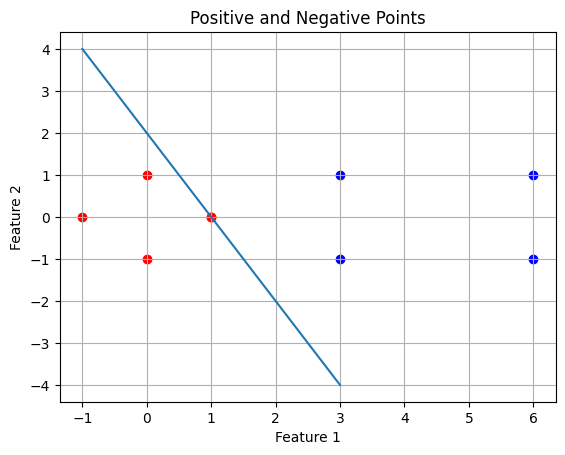

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

positive_set = [(3, 1), (3, -1), (6, 1), (6, -1)]
negative_set = [(1, 0), (0, 1), (0, -1), (-1, 0)]

pos=np.array(positive_set)
neg=np.array(negative_set)

plt.scatter(pos[:,0],pos[:,1],color='b',label='positive')
plt.scatter(neg[:,0],neg[:,1],color='r',label='negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Positive and Negative Points')

m = -2
b = 2

# Define the point
point = (1, 0)

# Generate x values
x_values = np.linspace(-1, 3, 100)

# Calculate y values using the equation y = mx + b
y_values = m * x_values + b

# Plot the line
plt.plot(x_values, y_values, label='y = -2x + 2')

# Plot the point
plt.scatter(*point, color='red', label='Point (1,0)')
plt.grid(True)
plt.show()

In [ ]:
#svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/cell_samples.csv')
print(df.head())
df['Class'].value_counts()
print(df.shape)
# this means in the class there are two values 2 and 4 and the number of times 2 and 4 occur

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
(699, 11)


<Axes: xlabel='Clump', ylabel='UnifSize'>

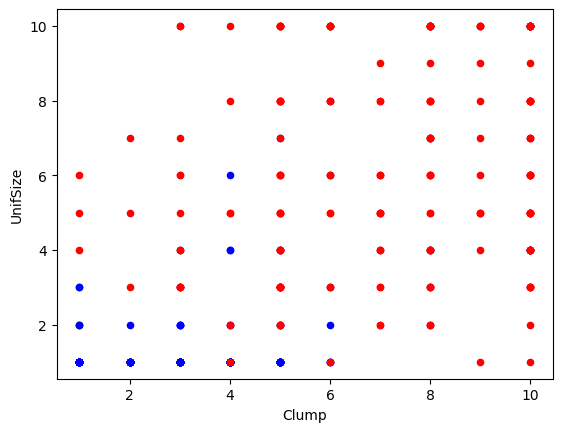

In [ ]:
malignant= df[df['Class']==4][0:200]
bengin=df[df['Class']==2][0:200]
axes=bengin.plot(x='Clump',y='UnifSize',kind='scatter',color='b')
malignant.plot(x='Clump',y='UnifSize',kind='scatter',color='r',ax=axes)

In [ ]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
df.columns
features=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

x=np.asarray(features)
y=np.asarray(df['Class'])
x[0:5]#values of those 9 features

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [ ]:
#knn
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
df1=pd.read_csv('/content/Iris (1).csv')
print(df1.head())
print(df1.shape)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


In [ ]:
df1=df1.drop('Id',axis=1)
df1=df1.drop('PetalLengthCm',axis=1)
df1=df1.drop('PetalWidthCm',axis=1)
no_zero=['SepalLengthCm',  'SepalWidthCm']
for column in no_zero:
  df1[column]=df1[column].replace(0,np.NaN)
  mean=int(df1[column].mean(skipna=True))
  df1[column]=df1[column].replace(np.NaN,mean)
df1.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


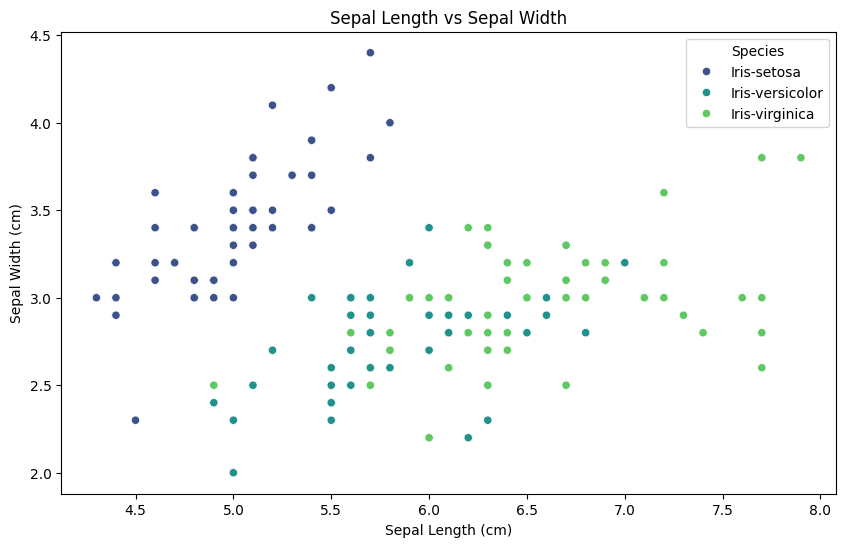

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

In [ ]:
x=df1.iloc[:,0:2]
y=df1.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
print(y_train.shape)

(120,)


In [ ]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0  5  8]
 [ 0  3  3]]


In [ ]:
new_sample = [[5.9, 3]]
new_sample_df = pd.DataFrame(new_sample, columns=no_zero)




new_sample_scaled = sc_x.transform(new_sample_df)

new_prediction = classifier.predict(new_sample_scaled)
print(f'The predicted class for sepal length 5.2 and sepal width 3.1 is: {new_prediction[0]}')

The predicted class for sepal length 5.2 and sepal width 3.1 is: Iris-versicolor


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

63.33333333333333


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScalar

iris=pd.read_csv('')
data=iris[['ouoedeuw','owieruio','ehyrwu']].values
target=iris['target'].values
tn=iris['target'].unique()

s=StandardScalar()
d=s.fit_transform(data)
pca=PCA(n_components=2)
pc=pca.fit_transform(d)
pcd=pd.DataFrame(data=pc,columns=['PC1','PC2'])
final_df=pd.concat([pcd,pd.DataFrame(target,columns=['target'])],axis=1)

plt.figure(figsize=(8,6))
colors=['r','g','b']
for target,colors,label in zip(target_names,colors,target_names):
  indices=final_df['target']==target
  plt.scatter(final_df.loc[indices,'PC1'],final_df.loc[indices,'PC2'],c=color,s=50,label=label)



In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

dataset = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Jam']
]
df=pd.DataFrame(dataset)
df.columns=['item1','item2','item3']
items=set()
for col in df.columns:
  items.update(df[col].unique())

items=set([item for item in items if pd.notna(items)])
encoded_val=[]
for index,row in df.iterrows():
  row_dict={item:0 for item in items}
  row_dict.update({item:1 for item in row if pd.notna(item)})
  encoded_val.append(row_dict)

df1=pd.DataFrame(encoded_val)
freq=apriori(df1,min_support=0.5,use_colnames=True)
rules=association_rules(freq,metric="confidence",min_threshold=0.7)
print(freq)
print(rules)

    support         itemsets
0  0.666667          (Bread)
1  0.666667           (Milk)
2  0.666667         (Butter)
3  0.500000  (Bread, Butter)
  antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)    (Butter)            0.666667            0.666667      0.5   
1    (Butter)     (Bread)            0.666667            0.666667      0.5   

   confidence   lift  leverage  conviction  zhangs_metric  
0        0.75  1.125  0.055556    1.333333       0.333333  
1        0.75  1.125  0.055556    1.333333       0.333333  


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
